# **Overview**

> **Detail Column:**

*   **tanggal:** donation submission date
*   **id_transaksi:** Transaction ID
*   **id_donatur:** Donator ID
*   **Nominal:** Donation amounts
*   **Akad:** Agreement between the donor and the institution
*   **Program:** Program category
*   **Payment:** Payment method
*   **Platform:** Payment platform
*   **type_trans:** Transaction type




> **Goals**
*   Create Donor Segmentation
*   Create a prediction model
*   Comparing which model matches the datasets








# **Data Preparation**

In [ ]:
# Import Libraries

from scipy import stats
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns
from datetime import timedelta


import warnings
warnings.filterwarnings('ignore')

Read the data in which the "payment" column has been grouped


In [ ]:
# Read the Data
df = pd.read_csv("donasi_online_update_12_maret_2022.csv")

In [ ]:
df

,tanggal,id_transaksi,id_donatur,nominal,akad,program,payment,platform,type_trans
0,2022-03-12,47409,31812,100000,Wakaf,Gerakan Wakaf 10.000 Al Quran untuk Indonesia,gopay,CFD v2,ONLINE_DONATION
1,2022-03-12,47408,31812,100000,Infaq Sedekah,"Yuk Sedekah Jumat, Berbagi Makan dengan Para Tamu",gopay,CFD v2,ONLINE_DONATION
2,2022-03-12,47400,25104,20000,Infaq Sedekah,sedekah subuh,BRI,Android,ONLINE_DONATION
3,2022-03-12,47399,28057,50000,Panti Asuhan,Panti Asuhan Kahfi 2 Jakarta Selatan,gopay,CFD v2,ONLINE_DONATION
4,2022-03-11,4413,18008,50000,Zakat Penghasilan,Zakat Penghasilan,bank_transfer,CFD v2,ONLINE_ZAKAT
...,...,...,...,...,...,...,...,...,...
24448,2019-12-23,32,27250,250000,Zakat Penghasilan,Zakat Penghasilan,Gopay,Not defined,ONLINE_ZAKAT
24449,2019-12-17,129,25812,100,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,Not defined,ONLINE_DONATION
24450,2019-12-17,130,25812,100,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,Not defined,ONLINE_DONATION
24451,2019-12-17,137,25812,100,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,Not defined,ONLINE_DONATION


In [ ]:
df.head()

,tanggal,id_transaksi,id_donatur,nominal,akad,program,payment,platform,type_trans
0,2022-03-12,47409,31812,100000,Wakaf,Gerakan Wakaf 10.000 Al Quran untuk Indonesia,gopay,CFD v2,ONLINE_DONATION
1,2022-03-12,47408,31812,100000,Infaq Sedekah,"Yuk Sedekah Jumat, Berbagi Makan dengan Para Tamu",gopay,CFD v2,ONLINE_DONATION
2,2022-03-12,47400,25104,20000,Infaq Sedekah,sedekah subuh,BRI,Android,ONLINE_DONATION
3,2022-03-12,47399,28057,50000,Panti Asuhan,Panti Asuhan Kahfi 2 Jakarta Selatan,gopay,CFD v2,ONLINE_DONATION
4,2022-03-11,4413,18008,50000,Zakat Penghasilan,Zakat Penghasilan,bank_transfer,CFD v2,ONLINE_ZAKAT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24453 entries, 0 to 24452
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tanggal       24453 non-null  object
 1   id_transaksi  24453 non-null  int64 
 2   id_donatur    24453 non-null  int64 
 3   nominal       24453 non-null  int64 
 4   akad          24453 non-null  object
 5   program       24453 non-null  object
 6   payment       24453 non-null  object
 7   platform      24453 non-null  object
 8   type_trans    24453 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.7+ MB


In [ ]:
# Check missing values
df.isnull().sum()

tanggal         0
id_transaksi    0
id_donatur      0
nominal         0
akad            0
program         0
payment         0
platform        0
type_trans      0
dtype: int64

In [ ]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

In [ ]:
print (df['tanggal'].dtypes)

datetime64[ns]


In [ ]:
!pip install missingno 

In [ ]:
import missingno as msno

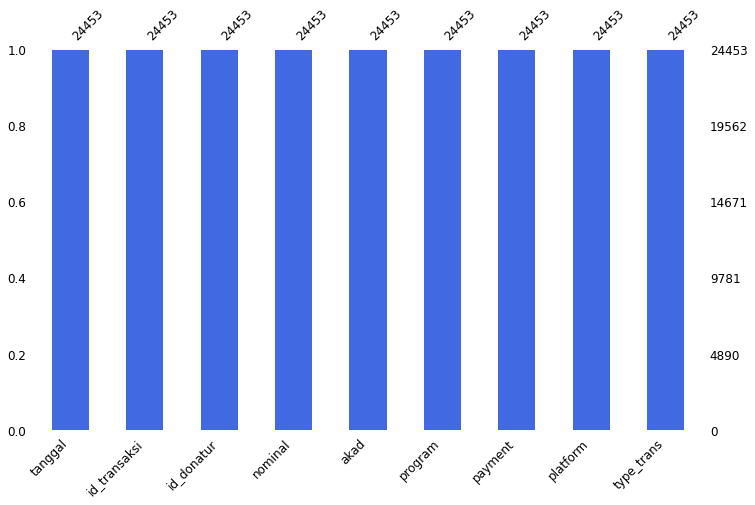

In [ ]:
# Missing value handling
msno.bar(df, color='royalblue', figsize=(12,7), fontsize=12)



## Data Forecasting Preparation





> Read data that has been grouped by date (daily nominal)



In [ ]:
# Read the Data
df_daily = pd.read_csv("df_daily.csv")

In [ ]:
df_daily.head()

,tanggal,nominal
0,12/17/2019,650300.0
1,12/18/2019,0.0
2,12/19/2019,0.0
3,12/20/2019,0.0
4,12/21/2019,0.0


In [ ]:
df_daily.dtypes

tanggal     object
nominal    float64
dtype: object

Read data that has been grouped by date (daily transaction) 

In [ ]:
# Read the Data
df_daily_transaction = pd.read_csv("df_daily_transaction.csv")

In [ ]:
df_daily_transaction

,tanggal,id_transaksi
0,12/17/2019,4
1,12/18/2019,0
2,12/19/2019,0
3,12/20/2019,0
4,12/21/2019,0
...,...,...
812,3/8/2022,14
813,3/9/2022,7
814,3/10/2022,10
815,3/11/2022,35


In [ ]:
df_daily_transaction.head()

,tanggal,id_transaksi
0,12/17/2019,4
1,12/18/2019,0
2,12/19/2019,0
3,12/20/2019,0
4,12/21/2019,0


In [ ]:
df_daily_transaction.dtypes

tanggal         object
id_transaksi     int64
dtype: object

# **Exploratory Data Analysis (EDA)**

In [ ]:
# check the earliest date of the data
oldest = df['tanggal'].min()
print(oldest)

2019-12-17 00:00:00


In [ ]:
# check the latest date
newest = df['tanggal'].max()
print(newest)

2022-03-12 00:00:00


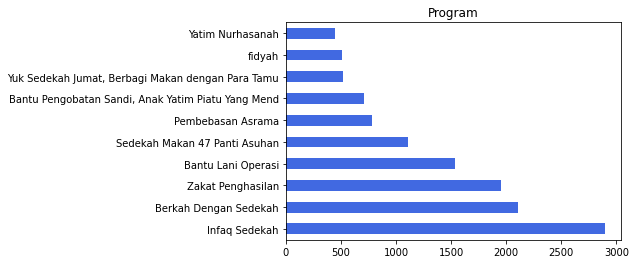

In [ ]:
ax = df['program'].value_counts()[:10].plot(kind='barh', title='Program', color='royalblue')

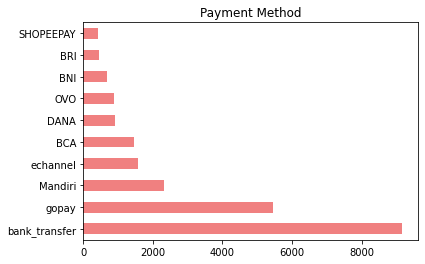

In [ ]:
ax = df['payment'].value_counts()[:10].plot(kind='barh', title='Payment Method', color='lightcoral')

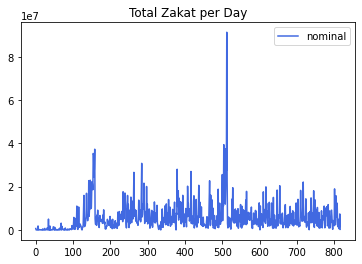

In [ ]:
ax = df_daily.plot(color='royalblue', title = 'Total Zakat per Day')

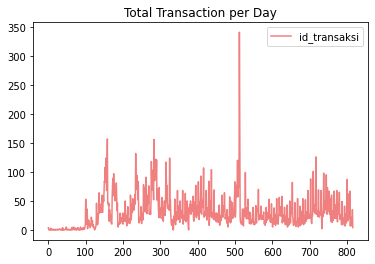

In [ ]:
ax = df_daily_transaction.plot(color='lightcoral', title = 'Total Transaction per Day')

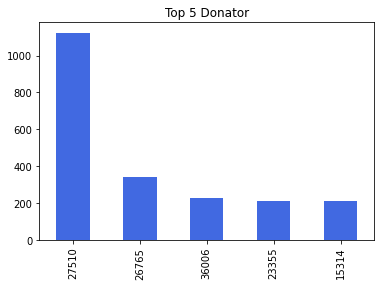

In [ ]:
ax = df['id_donatur'].value_counts()[:5].plot(kind='bar', title='Top 5 Donator', color='royalblue')

In [ ]:
# The Highest Donator
groups = df.groupby("id_donatur")["nominal"].sum()
groups2 = groups.nlargest(5)
groups2

id_donatur
26312    89031207
15314    43528821
23355    35240000
35496    32500000
29522    27968750
Name: nominal, dtype: int64

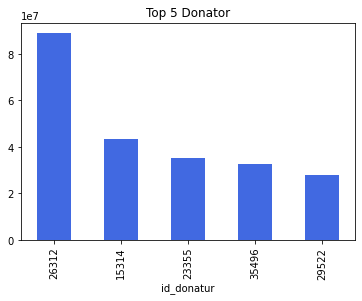

In [ ]:
groups2.plot(kind='bar', title='Top 5 Donator', color='royalblue')
plt.show()

# **Donatur Segmentation**

Donatur Segmentation by using RFM Analysis

In [ ]:
# Create snapshot date
snapshot_date = df['tanggal'].max() + timedelta(days=1)
print(snapshot_date)

2022-03-13 00:00:00


In [ ]:
# Grouping by id_donatur
RFM_Preprocess = df.groupby(['id_donatur']).agg({
        'tanggal': lambda x: (snapshot_date - x.max()).days,
        'id_transaksi': 'count',
        'nominal': 'sum'})

In [ ]:
# Renaming the columns 
RFM_Preprocess.rename(columns={'tanggal': 'Recency',
                         'id_transaksi': 'Frequency',
                         'nominal': 'Monetary'}, inplace=True)

In [ ]:
RFM_Preprocess.head()

,Recency,Frequency,Monetary
id_donatur,,,
14409,379,3,230000
14411,432,1,20000
14412,432,1,150000
14415,400,2,231069
14423,432,1,25000


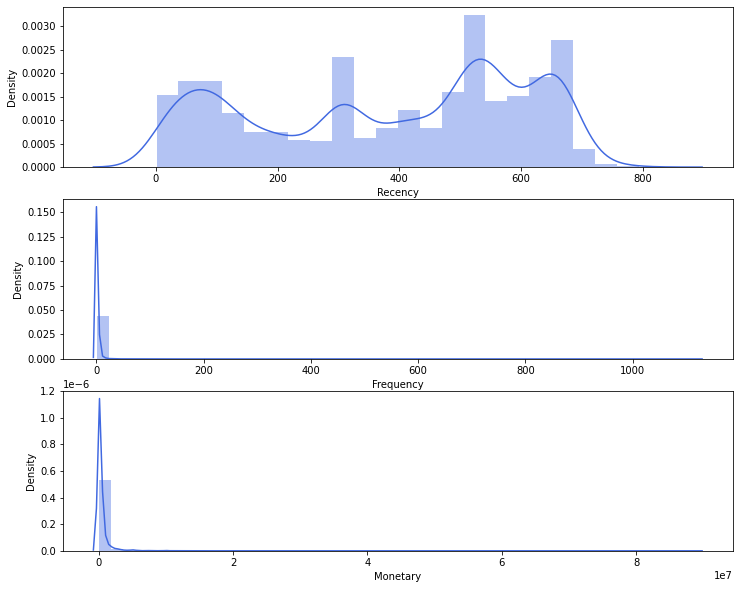

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFM_Preprocess['Recency'], color="royalblue")
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFM_Preprocess['Frequency'], color='royalblue')
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFM_Preprocess['Monetary'], color="royalblue")
# Show the plot
plt.show()



> RFM Quartiles



In [ ]:
quantile = RFM_Preprocess.quantile(q=[0.3, 0.7])
quantile

,Recency,Frequency,Monetary
0.3,247.0,1.0,50000.0
0.7,539.3,1.0,250000.0


In [ ]:
quantile.to_dict()

{'Frequency': {0.3: 1.0, 0.7: 1.0},
 'Monetary': {0.3: 50000.0, 0.7: 250000.0},
 'Recency': {0.3: 247.0, 0.7: 539.2999999999993}}



> Create RFM Segments



In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.3]:
        return 3
    elif x <= d[p][0.7]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.3]:
        return 1
    elif x <= d[p][0.7]:
        return 2
    else:
        return 3



*   Best Recency score 3 = most recently purchase
*   Best Frequency score 3 = most quantity purchase
*   Best Monetary score 3 = spent the most.




In [ ]:
#create rfm segmentation table
RFM_Segmentation = RFM_Preprocess
RFM_Segmentation['R_Score'] = RFM_Segmentation['Recency'].apply(RScore, args=('Recency',quantile))
RFM_Segmentation['F_Score'] = RFM_Segmentation['Frequency'].apply(FMScore, args=('Frequency',quantile))
RFM_Segmentation['M_Score'] = RFM_Segmentation['Monetary'].apply(FMScore, args=('Monetary',quantile))

In [ ]:
RFM_Segmentation.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
id_donatur,,,,,,
14409,379,3,230000,2,3,2
14411,432,1,20000,2,1,1
14412,432,1,150000,2,1,2
14415,400,2,231069,2,3,2
14423,432,1,25000,2,1,1


In [ ]:
RFM_Segmentation

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
id_donatur,,,,,,
14409,379,3,230000,2,3,2
14411,432,1,20000,2,1,1
14412,432,1,150000,2,1,2
14415,400,2,231069,2,3,2
14423,432,1,25000,2,1,1
...,...,...,...,...,...,...
36128,9,1,300000,3,1,3
36129,6,1,100000,3,1,2
36130,6,1,200000,3,1,2


In [ ]:
RFM_Segmentation.describe()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
count,10170.000000,10170.000000,1.017000e+04,10170.000000,10170.000000,10170.000000
mean,385.946018,2.404425,4.607348e+05,2.001180,1.593314,1.899705
std,218.929244,13.220921,1.692465e+06,0.775395,0.913613,0.806460
min,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000
25%,169.000000,1.000000,4.000000e+04,1.000000,1.000000,1.000000
50%,431.000000,1.000000,1.000000e+05,2.000000,1.000000,2.000000
75%,571.000000,2.000000,3.000000e+05,3.000000,3.000000,3.000000
max,794.000000,1123.000000,8.903121e+07,3.000000,3.000000,3.000000


In [ ]:
RFM_Segmentation['RFM_Score'] = RFM_Segmentation.R_Score.map(str) \
                            + RFM_Segmentation.F_Score.map(str) \
                            + RFM_Segmentation.M_Score.map(str)

In [ ]:
RFM_Segmentation.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
id_donatur,,,,,,,
14409,379,3,230000,2,3,2,232
14411,432,1,20000,2,1,1,211
14412,432,1,150000,2,1,2,212
14415,400,2,231069,2,3,2,232
14423,432,1,25000,2,1,1,211


In [ ]:
# Define RFM Segmentation function
def RFM_Segment(df):
  if df['RFM_Score'] == '333':
    return 'Champions Best Donator'
  elif df['RFM_Score'] == '332':
    return 'Champions Best Donator'
  elif df['RFM_Score'] == '331':
    return 'Potential High Donator'
  elif df['RFM_Score'] == '323':
    return 'Champions Best Donator'
  elif df['RFM_Score'] == '322':
    return 'Potential High Donator'
  elif df['RFM_Score'] == '321':
    return 'General Donator'
  elif df['RFM_Score'] == '313':
    return 'General Donator'
  elif df['RFM_Score'] == '312':
    return 'General Donator'
  elif df['RFM_Score'] == '311':
    return 'General Donator'
  elif df['RFM_Score'] == '233':
    return 'Champions Best Donator'
  elif df['RFM_Score'] == '232':
    return 'Potential High Donator'
  elif df['RFM_Score'] == '231':
    return 'General Donator' 
  elif df['RFM_Score'] == '223':
    return 'Potential High Donator'
  elif df['RFM_Score'] == '222':
    return 'General Donator'
  elif df['RFM_Score'] == '221':
    return 'About to Sleep' 
  elif df['RFM_Score'] == '213':
    return 'General Donator'
  elif df['RFM_Score'] == '212':
    return 'About to Sleep'
  elif df['RFM_Score'] == '211':
    return 'About to Sleep'
  elif df['RFM_Score'] == '133':
    return 'Churned Best Donator'
  elif df['RFM_Score'] == '132':
    return 'Churned Best Donator'
  elif df['RFM_Score'] == '131':
    return 'About to Sleep'
  elif df['RFM_Score'] == '123':
    return 'Churned Best Donator'
  elif df['RFM_Score'] == '122':
    return 'Churned Best Donator'
  elif df['RFM_Score'] == '121':
    return 'About to Sleep'
  elif df['RFM_Score'] == '113':
    return 'About to Sleep'
  elif df['RFM_Score'] == '112':
    return 'About to Sleep'
  else:
    return 'About to Sleep'

# Create a new variable RFM_Segment
RFM_Segmentation['RFM_Segment'] = RFM_Segmentation.apply(RFM_Segment, axis=1)
# Print the header with top 5 rows to the console
RFM_Segmentation.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment
id_donatur,,,,,,,,
14409,379,3,230000,2,3,2,232,Potential High Donator
14411,432,1,20000,2,1,1,211,About to Sleep
14412,432,1,150000,2,1,2,212,About to Sleep
14415,400,2,231069,2,3,2,232,Potential High Donator
14423,432,1,25000,2,1,1,211,About to Sleep


In [ ]:
# Best Donator
RFM_Segmentation[RFM_Segmentation['RFM_Score'] == '333'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment
id_donatur,,,,,,,,
26312,119,9,89031207,3,3,3,333,Champions Best Donator
15314,128,210,43528821,3,3,3,333,Champions Best Donator
35496,10,7,32500000,3,3,3,333,Champions Best Donator
28050,29,8,22000000,3,3,3,333,Champions Best Donator
33634,12,43,20120000,3,3,3,333,Champions Best Donator
24181,134,53,17543491,3,3,3,333,Champions Best Donator
26437,2,45,16750000,3,3,3,333,Champions Best Donator
16601,10,5,15750000,3,3,3,333,Champions Best Donator
35646,12,19,15200000,3,3,3,333,Champions Best Donator


In [ ]:
# Calculate average values for each RFM_Segment, and return a size of each segment 
RFM_level_agg = RFM_Segmentation.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(RFM_level_agg)

                       Recency Frequency   Monetary      
                          mean      mean       mean count
RFM_Segment                                              
About to Sleep           538.6       1.0   134470.3  5038
Champions Best Donator   186.6       7.2  1512578.9  1894
Churned Best Donator     615.0       3.7   698545.2   343
General Donator          195.3       1.2   350609.9  2401
Potential High Donator   361.3       3.2   125449.5   494


In [ ]:
RFM_Segmentation["RFM_Segment"].value_counts()

About to Sleep            5038
General Donator           2401
Champions Best Donator    1894
Potential High Donator     494
Churned Best Donator       343
Name: RFM_Segment, dtype: int64

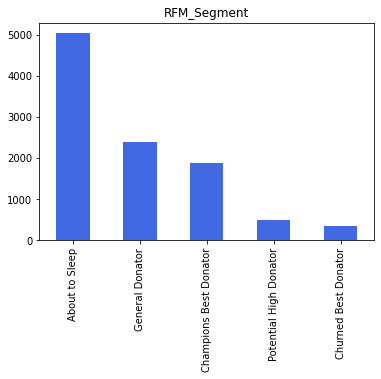

In [ ]:
RFM_Segmentation['RFM_Segment'].value_counts().plot(kind='bar', title='RFM_Segment', color='royalblue')

In [ ]:
!pip install squarify

In [ ]:
import squarify

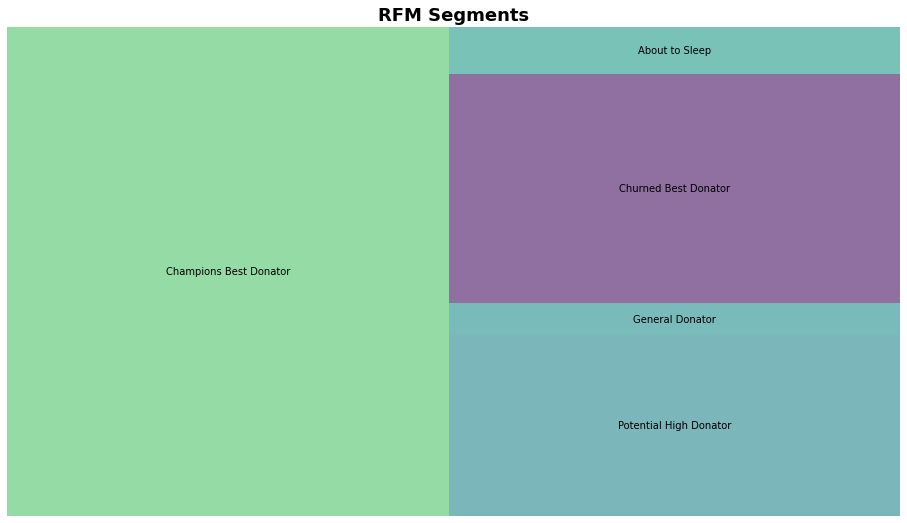

In [ ]:
RFM_level_agg.columns = RFM_level_agg.columns.droplevel()
RFM_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=RFM_level_agg['Count'], 
              label=['Champions Best Donator',
                     'Potential High Donator',
                     'General Donator',
                     'Churned Best Donator', 
                     'About to Sleep'], alpha=.6 )
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()



> Join to the RFM_Segmentation to the first DataFrame



In [ ]:
RFM_df = RFM_Segmentation.drop(['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score'], axis=1)

In [ ]:
RFM_df

,RFM_Segment
id_donatur,
14409,Potential High Donator
14411,About to Sleep
14412,About to Sleep
14415,Potential High Donator
14423,About to Sleep
...,...
36128,General Donator
36129,General Donator
36130,General Donator


In [ ]:
# Left join the dataframe
df_RFM = pd.merge(df,RFM_df,on='id_donatur',how='left')

In [ ]:
df_RFM

,tanggal,id_transaksi,id_donatur,nominal,akad,program,payment,platform,type_trans,RFM_Segment
0,2022-03-12,47409,31812,100000,Wakaf,Gerakan Wakaf 10.000 Al Quran untuk Indonesia,gopay,CFD v2,ONLINE_DONATION,Champions Best Donator
1,2022-03-12,47408,31812,100000,Infaq Sedekah,"Yuk Sedekah Jumat, Berbagi Makan dengan Para Tamu",gopay,CFD v2,ONLINE_DONATION,Champions Best Donator
2,2022-03-12,47400,25104,20000,Infaq Sedekah,sedekah subuh,BRI,Android,ONLINE_DONATION,Champions Best Donator
3,2022-03-12,47399,28057,50000,Panti Asuhan,Panti Asuhan Kahfi 2 Jakarta Selatan,gopay,CFD v2,ONLINE_DONATION,Champions Best Donator
4,2022-03-11,4413,18008,50000,Zakat Penghasilan,Zakat Penghasilan,bank_transfer,CFD v2,ONLINE_ZAKAT,Champions Best Donator
...,...,...,...,...,...,...,...,...,...,...
24448,2019-12-23,32,27250,250000,Zakat Penghasilan,Zakat Penghasilan,Gopay,Not defined,ONLINE_ZAKAT,Churned Best Donator
24449,2019-12-17,129,25812,100,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,Not defined,ONLINE_DONATION,About to Sleep
24450,2019-12-17,130,25812,100,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,Not defined,ONLINE_DONATION,About to Sleep
24451,2019-12-17,137,25812,100,Panti Asuhan,Panti Asuhan Mizan Amanah Kesehatan Bintaro,Gopay,Not defined,ONLINE_DONATION,About to Sleep


In [ ]:
df_RFM["RFM_Segment"].value_counts()

Champions Best Donator    13680
About to Sleep             5154
General Donator            2777
Potential High Donator     1564
Churned Best Donator       1278
Name: RFM_Segment, dtype: int64

In [ ]:
# Donator frequency
Freq_Donator_df = RFM_Segmentation.drop(['Recency', 'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score'], axis=1)
Freq_Donator_df

,Frequency,RFM_Segment
id_donatur,,
14409,3,Potential High Donator
14411,1,About to Sleep
14412,1,About to Sleep
14415,2,Potential High Donator
14423,1,About to Sleep
...,...,...
36128,1,General Donator
36129,1,General Donator
36130,1,General Donator


In [ ]:
# Top spender donator Donator and their segment
Top_spender_donator = pd.merge(Freq_Donator_df,groups2, on='id_donatur',how='right')
Top_spender_donator

,Frequency,RFM_Segment,nominal
id_donatur,,,
26312,9,Champions Best Donator,89031207
15314,210,Champions Best Donator,43528821
23355,212,Champions Best Donator,35240000
35496,7,Champions Best Donator,32500000
29522,163,Churned Best Donator,27968750


In [ ]:
# Most Loyal Donator and their segment
Loyal_donator = pd.merge(Freq_Donator_df,groups2, on='id_donatur',how='right')
Most_loyal_donator = Loyal_donator.drop(['nominal'], axis=1)
Most_loyal_donator.sort_values(by=['Frequency'], ascending=False)

,Frequency,RFM_Segment
id_donatur,,
23355,212,Champions Best Donator
15314,210,Champions Best Donator
29522,163,Churned Best Donator
26312,9,Champions Best Donator
35496,7,Champions Best Donator




> Save a new Dataframe in order to create a dashboard



In [ ]:
#Export as download if in colab
df_RFM.to_csv('df_RFM.csv', index=False)

In [ ]:
! ls

df_daily.csv		  df_RFM.csv				  sample_data
df_daily_transaction.csv  df_trx.csv
df_fc.csv		  donasi_online_update_12_maret_2022.csv


# **Forecast Data Preprocessing**

## Machine Learning Approach



> Lagged function


In [ ]:
#lagged Function, just copas from 
#https://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
def LaggedFeatures(s,lag=2,fillna=True, dropna=False):
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print ('Only works for DataFrame or Series')
        return None
    if dropna:
        res = res.dropna()
    else:
        res = res
    if fillna:
        return res.fillna(0)
    else:
        return res 

In [ ]:
data = df_daily.drop(['tanggal'], axis=1)
data.head()

,nominal
0,650300.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   nominal  817 non-null    float64
dtypes: float64(1)
memory usage: 6.5 KB


In [ ]:
data.shape

(817, 1)

In [ ]:
# Crate lag
lag = LaggedFeatures(data,lag=5,fillna=True, dropna=True)
lag.shape

(812, 6)

In [ ]:
lag.head()

,nominal,nominal_lag1,nominal_lag2,nominal_lag3,nominal_lag4,nominal_lag5
5,0.0,0.0,0.0,0.0,0.0,650300.0
6,1831000.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1831000.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1831000.0,0.0,0.0,0.0
9,150000.0,0.0,0.0,1831000.0,0.0,0.0


In [ ]:
train = lag.iloc[:600]
test = lag.iloc[600:]
train

,nominal,nominal_lag1,nominal_lag2,nominal_lag3,nominal_lag4,nominal_lag5
5,0.0,0.0,0.0,0.0,0.0,650300.0
6,1831000.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1831000.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1831000.0,0.0,0.0,0.0
9,150000.0,0.0,0.0,1831000.0,0.0,0.0
...,...,...,...,...,...,...
600,7311000.0,12510000.0,8458500.0,1539311.0,4587000.0,2791500.0
601,33002.0,7311000.0,12510000.0,8458500.0,1539311.0,4587000.0
602,11075067.0,33002.0,7311000.0,12510000.0,8458500.0,1539311.0
603,2055024.0,11075067.0,33002.0,7311000.0,12510000.0,8458500.0


In [ ]:
# Create x and y 

x_train = train.drop(['nominal'], axis=1)
x_test = test.drop(['nominal'], axis=1)

y_train = train['nominal']
y_test = test['nominal']

x_train = x_train.astype(float).values
y_train = y_train.astype(float).values

x_test = x_test.astype(float).values
y_test = y_test.astype(float).values


In [ ]:
# import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

rf = RandomForestRegressor()
mlp = MLPRegressor()
lr = LinearRegression()

# train
rf.fit(x_train, y_train)
mlp.fit(x_train, y_train)
lr.fit(x_train, y_train)


LinearRegression()

In [ ]:
# predicted
y_pred_rf = rf.predict(x_test)
y_pred_mlp = mlp.predict(x_test)
y_pred_lr = lr.predict(x_test)

print("Random Forest Regressor")
print("MSE: ", mean_squared_error(y_test,y_pred_rf))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("R2: ", r2_score(y_test,y_pred_rf))
print("")

print("MLP Regressor")
print("MSE: ", mean_squared_error(y_test,y_pred_mlp))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_mlp)))
print("R2: ", r2_score(y_test,y_pred_mlp))
print("")

print("Linear Regression")
print("MSE: ", mean_squared_error(y_test,y_pred_lr))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print("R2: ", r2_score(y_test,y_pred_lr))
print("")

Random Forest Regressor
MSE:  24011025713448.242
RMSE:  4900104.663519775
R2:  -0.27901347973396096

MLP Regressor
MSE:  23775324536043.973
RMSE:  4875994.722725197
R2:  -0.2664582067236796

Linear Regression
MSE:  22396931000983.34
RMSE:  4732539.593176516
R2:  -0.19303427503661008



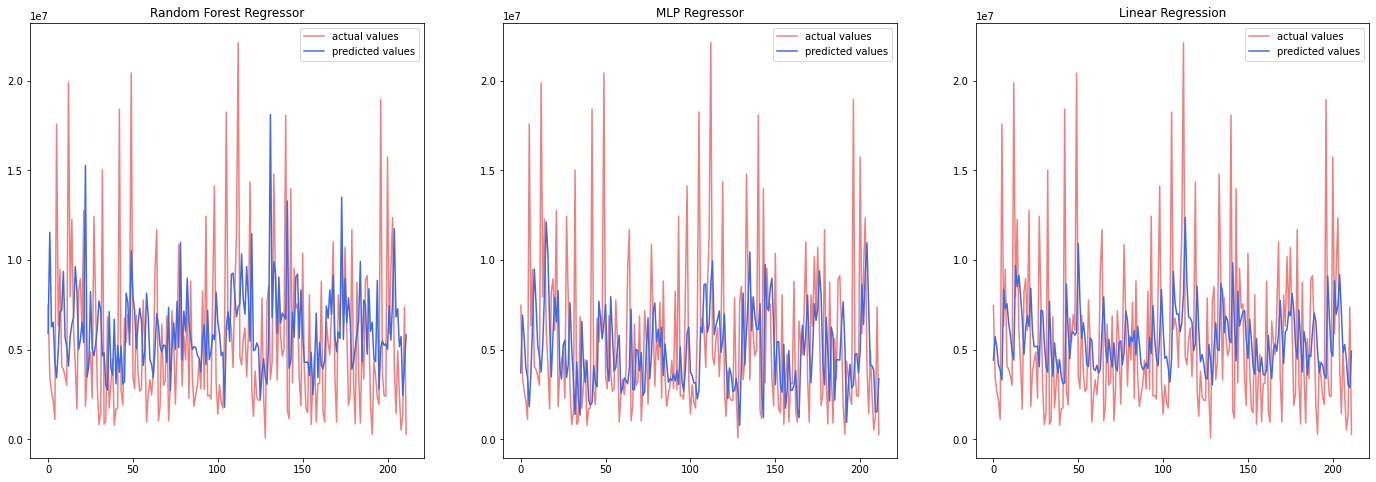

In [ ]:
# Plot the results

fig, axs = plt.subplots(1,3, figsize=(24,8))

axs[0].plot(y_test[:600],label="actual values",c='lightcoral')
axs[0].plot(y_pred_rf[:600],label="predicted values",c='royalblue')
axs[0].set_title("Random Forest Regressor")
axs[0].legend()

axs[1].plot(y_test[:600],label="actual values",c='lightcoral')
axs[1].plot(y_pred_mlp[:600],label="predicted values",c='royalblue')
axs[1].set_title("MLP Regressor")
axs[1].legend()

axs[2].plot(y_test[:600],label="actual values",c='lightcoral')
axs[2].plot(y_pred_lr[:600],label="predicted values",c='royalblue')
axs[2].set_title("Linear Regression")
axs[2].legend()



## FB Prophet



### Daily Donation

In [ ]:
df_daily.head()

,tanggal,nominal
0,12/17/2019,650300.0
1,12/18/2019,0.0
2,12/19/2019,0.0
3,12/20/2019,0.0
4,12/21/2019,0.0


In [ ]:
!pip install fbprophet

In [ ]:
from sklearn import preprocessing
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
# Rename column name
daily_nominal = df_daily[['tanggal','nominal']].rename(
columns = {'tanggal':'ds',
             'nominal':'y'})
daily_nominal.head()

,ds,y
0,12/17/2019,650300.0
1,12/18/2019,0.0
2,12/19/2019,0.0
3,12/20/2019,0.0
4,12/21/2019,0.0


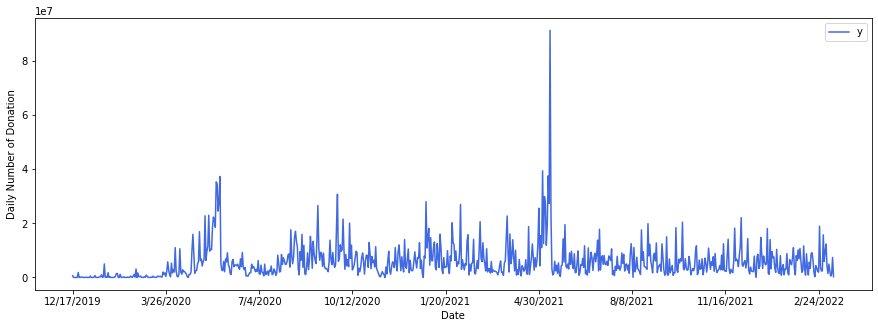

In [ ]:
# plot daily donation
ax = daily_nominal.set_index('ds').plot(figsize = (15, 5), color='royalblue')
ax.set_ylabel('Daily Number of Donation')
ax.set_xlabel('Date')
plt.show()

In [ ]:
# convert to datetime
daily_nominal['ds'] = pd.to_datetime(daily_nominal['ds'])
daily_nominal.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [ ]:
daily_nominal['ds'].quantile(0.80)

Timestamp('2021-09-29 19:12:00')

In [ ]:
# Split train and test 
cutoff = pd.to_datetime('2021-09-29')
train = daily_nominal[daily_nominal['ds'] < cutoff]
test = daily_nominal[daily_nominal['ds'] >= cutoff]

In [ ]:
# Fitting model
m1 = Prophet()
m1.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 5)
m1.fit(train) #only train

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Forecasting
future_daily = m1.make_future_dataframe(periods=600, freq='D')
forecast_daily = m1.predict(future_daily)
forecast_daily.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-17,-981260.966680,-1.032481e+07,6.024328e+06,-981260.966680,-981260.966680,-1.391451e+06,-1.391451e+06,-1.391451e+06,-8.552180e+05,-8.552180e+05,-8.552180e+05,-5.362332e+05,-5.362332e+05,-5.362332e+05,0.0,0.0,0.0,-2.372712e+06
1,2019-12-18,-936009.647267,-9.077738e+06,7.863086e+06,-936009.647267,-936009.647267,3.954297e+04,3.954297e+04,3.954297e+04,-5.365452e+05,-5.365452e+05,-5.365452e+05,5.760882e+05,5.760882e+05,5.760882e+05,0.0,0.0,0.0,-8.964667e+05
2,2019-12-19,-890758.327855,-1.006270e+07,6.552194e+06,-890758.327855,-890758.327855,-1.072847e+06,-1.072847e+06,-1.072847e+06,-6.450465e+05,-6.450465e+05,-6.450465e+05,-4.278006e+05,-4.278006e+05,-4.278006e+05,0.0,0.0,0.0,-1.963605e+06
3,2019-12-20,-845507.008443,-6.192243e+06,1.009168e+07,-845507.008443,-845507.008443,2.652259e+06,2.652259e+06,2.652259e+06,-9.389501e+05,-9.389501e+05,-9.389501e+05,3.591210e+06,3.591210e+06,3.591210e+06,0.0,0.0,0.0,1.806752e+06
4,2019-12-21,-800255.689030,-1.020332e+07,6.041642e+06,-800255.689030,-800255.689030,-1.559448e+06,-1.559448e+06,-1.559448e+06,-1.053919e+06,-1.053919e+06,-1.053919e+06,-5.055281e+05,-5.055281e+05,-5.055281e+05,0.0,0.0,0.0,-2.359703e+06


In [ ]:
forecast_daily

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-17,-9.812610e+05,-1.032481e+07,6.024328e+06,-9.812610e+05,-9.812610e+05,-1.391451e+06,-1.391451e+06,-1.391451e+06,-8.552180e+05,-8.552180e+05,-8.552180e+05,-5.362332e+05,-5.362332e+05,-5.362332e+05,0.0,0.0,0.0,-2.372712e+06
1,2019-12-18,-9.360096e+05,-9.077738e+06,7.863086e+06,-9.360096e+05,-9.360096e+05,3.954297e+04,3.954297e+04,3.954297e+04,-5.365452e+05,-5.365452e+05,-5.365452e+05,5.760882e+05,5.760882e+05,5.760882e+05,0.0,0.0,0.0,-8.964667e+05
2,2019-12-19,-8.907583e+05,-1.006270e+07,6.552194e+06,-8.907583e+05,-8.907583e+05,-1.072847e+06,-1.072847e+06,-1.072847e+06,-6.450465e+05,-6.450465e+05,-6.450465e+05,-4.278006e+05,-4.278006e+05,-4.278006e+05,0.0,0.0,0.0,-1.963605e+06
3,2019-12-20,-8.455070e+05,-6.192243e+06,1.009168e+07,-8.455070e+05,-8.455070e+05,2.652259e+06,2.652259e+06,2.652259e+06,-9.389501e+05,-9.389501e+05,-9.389501e+05,3.591210e+06,3.591210e+06,3.591210e+06,0.0,0.0,0.0,1.806752e+06
4,2019-12-21,-8.002557e+05,-1.020332e+07,6.041642e+06,-8.002557e+05,-8.002557e+05,-1.559448e+06,-1.559448e+06,-1.559448e+06,-1.053919e+06,-1.053919e+06,-1.053919e+06,-5.055281e+05,-5.055281e+05,-5.055281e+05,0.0,0.0,0.0,-2.359703e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,2023-05-17,-3.451104e+06,-1.560471e+07,6.333190e+06,-1.066998e+07,3.807611e+06,-9.078149e+05,-9.078149e+05,-9.078149e+05,-1.483903e+06,-1.483903e+06,-1.483903e+06,5.760882e+05,5.760882e+05,5.760882e+05,0.0,0.0,0.0,-4.358919e+06
1248,2023-05-18,-3.466251e+06,-1.640002e+07,4.848535e+06,-1.070089e+07,3.813210e+06,-2.371920e+06,-2.371920e+06,-2.371920e+06,-1.944119e+06,-1.944119e+06,-1.944119e+06,-4.278006e+05,-4.278006e+05,-4.278006e+05,0.0,0.0,0.0,-5.838171e+06
1249,2023-05-19,-3.481398e+06,-1.274376e+07,9.299313e+06,-1.073180e+07,3.820191e+06,1.846478e+06,1.846478e+06,1.846478e+06,-1.744732e+06,-1.744732e+06,-1.744732e+06,3.591210e+06,3.591210e+06,3.591210e+06,0.0,0.0,0.0,-1.634920e+06
1250,2023-05-20,-3.496544e+06,-1.576711e+07,5.496641e+06,-1.076271e+07,3.819227e+06,-1.653712e+06,-1.653712e+06,-1.653712e+06,-1.148184e+06,-1.148184e+06,-1.148184e+06,-5.055281e+05,-5.055281e+05,-5.055281e+05,0.0,0.0,0.0,-5.150256e+06


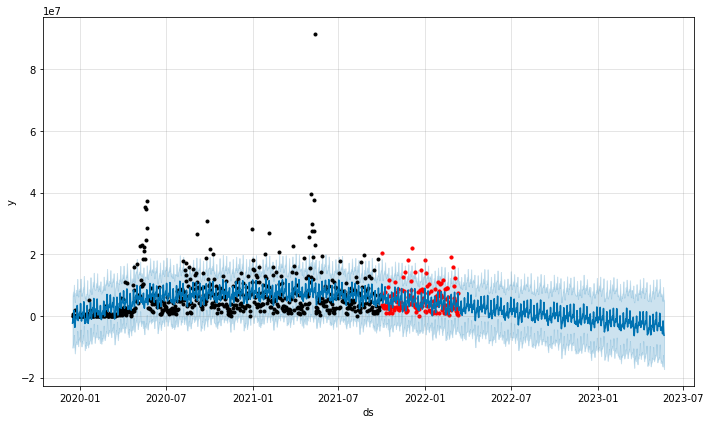

In [ ]:
# Visualize
fig = m1.plot(forecast_daily)
plt.scatter(x=test['ds'], y=test['y'], s=10, color='red')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Set metric for forecast_daily
metric_df1 = forecast_daily.set_index('ds')[['yhat']].join(daily_nominal.set_index('ds').y).reset_index()

In [ ]:
metric_df1.tail()

,ds,yhat,y
1247,2023-05-17,-4.358919e+06,NaN
1248,2023-05-18,-5.838171e+06,NaN
1249,2023-05-19,-1.634920e+06,NaN
1250,2023-05-20,-5.150256e+06,NaN
1251,2023-05-21,-6.290316e+06,NaN


In [ ]:
metric_df1.dropna(inplace=True)

In [ ]:
metric_df1

,ds,yhat,y
0,2019-12-17,-2.372712e+06,650300.0
1,2019-12-18,-8.964667e+05,0.0
2,2019-12-19,-1.963605e+06,0.0
3,2019-12-20,1.806752e+06,0.0
4,2019-12-21,-2.359703e+06,0.0
...,...,...,...
812,2022-03-08,3.172662e+06,2460400.0
813,2022-03-09,4.164002e+06,520000.0
814,2022-03-10,3.130409e+06,1331062.0
815,2022-03-11,7.313344e+06,7382305.0


In [ ]:
# R2 Score
R2 = r2_score(metric_df1.y, metric_df1.yhat)
R2

0.19347215390091144

In [ ]:
# MSE
MSE = mean_squared_error(metric_df1.y, metric_df1.yhat)
MSE

34323739986759.363

In [ ]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

5858646.600261819

In [ ]:
# MAE
MAE = mean_absolute_error(metric_df1.y, metric_df1.yhat)
MAE

3426151.145471972

In [ ]:
metric_1=metric_df1.copy()

In [ ]:
# Calculate Error Percentage
metric_1['Error %'] = ((metric_1['yhat'] - metric_1['y']) / metric_1['yhat']) * 100
metric_1

,ds,yhat,y,Error %
0,2019-12-17,-2.372712e+06,650300.0,127.407455
1,2019-12-18,-8.964667e+05,0.0,100.000000
2,2019-12-19,-1.963605e+06,0.0,100.000000
3,2019-12-20,1.806752e+06,0.0,100.000000
4,2019-12-21,-2.359703e+06,0.0,100.000000
...,...,...,...,...
812,2022-03-08,3.172662e+06,2460400.0,22.449972
813,2022-03-09,4.164002e+06,520000.0,87.512014
814,2022-03-10,3.130409e+06,1331062.0,57.479611
815,2022-03-11,7.313344e+06,7382305.0,-0.942942


In [ ]:
# Average Error Percentage
metric_1["Error %"].mean()

-5.325126658052975



> Plot Components



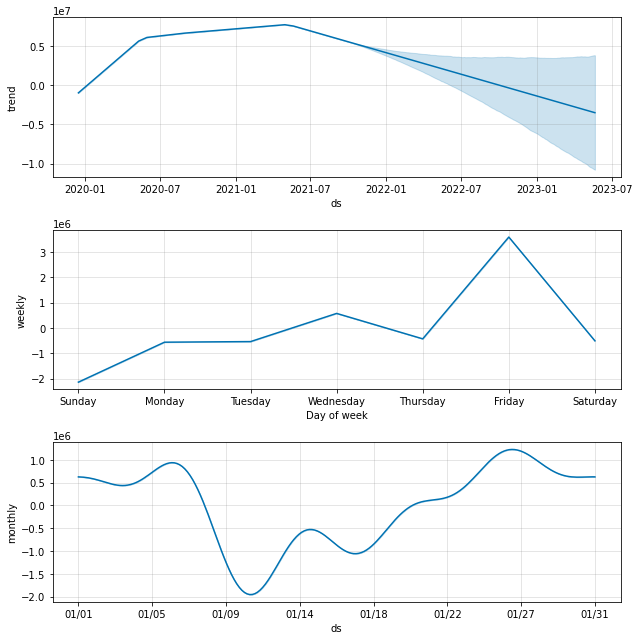

In [ ]:
fig = m1.plot_components(forecast_daily)

In [ ]:
# Cross Validation
df_cv1 = cross_validation(m1, initial='365 days', horizon='120 days')
df_cv1

INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-05-31 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-01,7.558387e+06,7.765702e+05,1.417534e+07,4083988.0,2021-01-31
1,2021-02-02,6.963622e+06,6.684365e+05,1.418497e+07,5654589.0,2021-01-31
2,2021-02-03,7.597164e+06,1.219399e+06,1.414731e+07,5016516.0,2021-01-31
3,2021-02-04,7.519075e+06,5.585123e+05,1.414781e+07,9268246.0,2021-01-31
4,2021-02-05,1.112179e+07,4.688196e+06,1.737592e+07,27017900.0,2021-01-31
...,...,...,...,...,...,...
355,2021-09-24,1.380870e+07,5.068735e+06,2.227058e+07,18426775.0,2021-05-31
356,2021-09-25,1.017377e+07,1.449373e+06,1.886002e+07,2729000.0,2021-05-31
357,2021-09-26,8.311653e+06,-3.420346e+05,1.749557e+07,1923999.0,2021-05-31
358,2021-09-27,1.057381e+07,2.091594e+06,1.947994e+07,6760516.0,2021-05-31


In [ ]:
# Export as download if in colab
df_cv1.to_csv('df_cv1.csv', index=False)

In [ ]:
! ls

df_cv1.csv		  df_fc.csv   donasi_online_update_12_maret_2022.csv
df_daily.csv		  df_RFM.csv  sample_data
df_daily_transaction.csv  df_trx.csv


In [ ]:
# Performance metrics
df_p1 = performance_metrics(df_cv1)
df_p1

,horizon,mse,rmse,mae,mape,mdape,coverage
0,12 days,2.579174e+13,5.078557e+06,4.158951e+06,1.709826,0.611042,0.916667
1,13 days,2.750861e+13,5.244865e+06,4.317303e+06,1.774319,0.611042,0.888889
2,14 days,2.826667e+13,5.316641e+06,4.497452e+06,1.923027,0.834295,0.888889
3,15 days,2.768266e+13,5.261431e+06,4.407963e+06,1.887816,0.665780,0.888889
4,16 days,2.799984e+13,5.291487e+06,4.426257e+06,2.018582,0.834295,0.888889
...,...,...,...,...,...,...,...
104,116 days,2.969676e+13,5.449473e+06,4.951210e+06,3.019665,1.317897,0.861111
105,117 days,3.119309e+13,5.585078e+06,5.107427e+06,2.896484,1.222962,0.833333
106,118 days,3.140614e+13,5.604118e+06,5.155467e+06,2.991345,1.317897,0.833333
107,119 days,2.937798e+13,5.420145e+06,4.949860e+06,2.714597,1.181987,0.833333


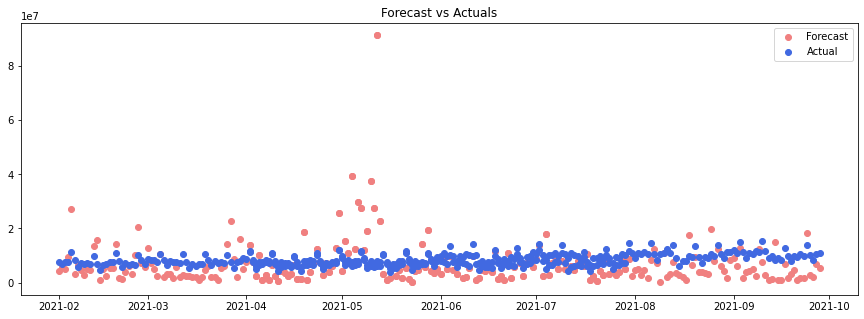

In [ ]:
# Compare the Forecast (Predicted) vs Actuals
plt.figure(figsize=(15, 5))
plt.scatter(df_cv1['ds'], df_cv1['y'],c='lightcoral', label='actual')
plt.scatter(df_cv1['ds'], df_cv1['yhat'], c='royalblue', label='predicted')
plt.legend(['Forecast','Actual'])
plt.title('Forecast vs Actuals')
plt.show()

In [ ]:
# Export as download if in colab
df_p1.to_csv('df_p1.csv', index=False)

In [ ]:
! ls

df_cv1.csv		  df_fc.csv   df_trx.csv
df_daily.csv		  df_p1.csv   donasi_online_update_12_maret_2022.csv
df_daily_transaction.csv  df_RFM.csv  sample_data




> **Insert seasonal "Holiday"**



In [ ]:
holiday = pd.DataFrame({
    'holiday' : 'eid_al_fitr',
    'ds' : pd.to_datetime(['2020-05-25','2021-05-14',  # past date, historical data 
                           '2022-05-02', '2023-04-21']),# future date, to be forecasted
    'lower_window' : -30,
    'upper_window' : 0})
holiday

,holiday,ds,lower_window,upper_window
0,eid_al_fitr,2020-05-25,-30,0
1,eid_al_fitr,2021-05-14,-30,0
2,eid_al_fitr,2022-05-02,-30,0
3,eid_al_fitr,2023-04-21,-30,0


In [ ]:
# Fitting model 
m2 = Prophet(
    holidays = holiday,
    holidays_prior_scale = 0.1 )
m2.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 5)
m2.fit(train) #only train

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Forecasting
future_daily_holiday = m2.make_future_dataframe(periods = 600, freq = 'D')
forecast_daily_holiday = m2.predict(future_daily_holiday)
forecast_daily_holiday.loc[(forecast_daily_holiday.yhat < 0),['yhat']] = 0
forecast_daily_holiday.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,eid_al_fitr,...,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-17,-695294.294268,-7.383138e+06,3.548553e+06,-695294.294268,-695294.294268,-1.374579e+06,-1.374579e+06,-1.374579e+06,0.0,...,-1.014322e+06,-1.014322e+06,-1.014322e+06,-3.602563e+05,-3.602563e+05,-3.602563e+05,0.0,0.0,0.0,0.000000e+00
1,2019-12-18,-666413.814658,-6.427693e+06,4.172400e+06,-666413.814658,-666413.814658,-2.240760e+05,-2.240760e+05,-2.240760e+05,0.0,...,-5.833259e+05,-5.833259e+05,-5.833259e+05,3.592499e+05,3.592499e+05,3.592499e+05,0.0,0.0,0.0,0.000000e+00
2,2019-12-19,-637533.335048,-7.000206e+06,3.375883e+06,-637533.335048,-637533.335048,-1.169563e+06,-1.169563e+06,-1.169563e+06,0.0,...,-6.580875e+05,-6.580875e+05,-6.580875e+05,-5.114752e+05,-5.114752e+05,-5.114752e+05,0.0,0.0,0.0,0.000000e+00
3,2019-12-20,-608652.855438,-3.593562e+06,7.265428e+06,-608652.855438,-608652.855438,2.493147e+06,2.493147e+06,2.493147e+06,0.0,...,-1.204469e+06,-1.204469e+06,-1.204469e+06,3.697615e+06,3.697615e+06,3.697615e+06,0.0,0.0,0.0,1.884494e+06
4,2019-12-21,-579772.375829,-8.701166e+06,2.515498e+06,-579772.375829,-579772.375829,-2.353861e+06,-2.353861e+06,-2.353861e+06,0.0,...,-1.726883e+06,-1.726883e+06,-1.726883e+06,-6.269780e+05,-6.269780e+05,-6.269780e+05,0.0,0.0,0.0,0.000000e+00


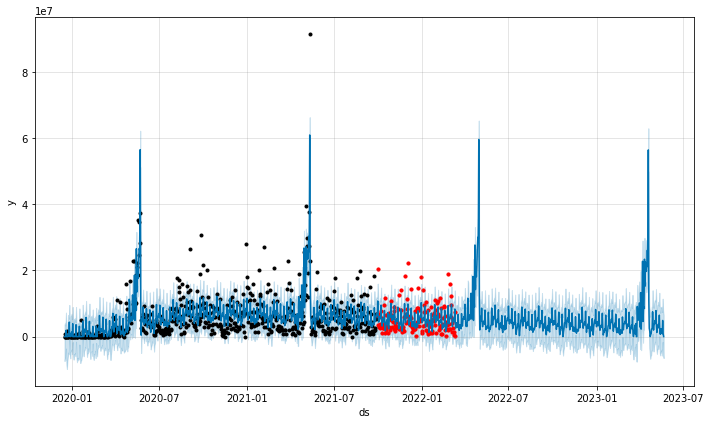

In [ ]:
# Visualize
fig = m2.plot(forecast_daily_holiday)
plt.scatter(x=test['ds'], y=test['y'], s=10, color='red')
plt.show()

In [ ]:
# Set metric for forecast_daily_holiday
metric_df2 = forecast_daily_holiday.set_index('ds')[['yhat']].join(daily_nominal.set_index('ds').y).reset_index()

In [ ]:
metric_df2.tail()

,ds,yhat,y
1247,2023-05-17,2.348281e+06,NaN
1248,2023-05-18,8.612388e+05,NaN
1249,2023-05-19,4.874176e+06,NaN
1250,2023-05-20,8.914711e+05,NaN
1251,2023-05-21,2.609233e+04,NaN


In [ ]:
metric_df2.dropna(inplace=True)

In [ ]:
metric_df2

,ds,yhat,y
0,2019-12-17,0.000000e+00,650300.0
1,2019-12-18,0.000000e+00,0.0
2,2019-12-19,0.000000e+00,0.0
3,2019-12-20,1.884494e+06,0.0
4,2019-12-21,0.000000e+00,0.0
...,...,...,...
812,2022-03-08,4.921682e+06,2460400.0
813,2022-03-09,5.631092e+06,520000.0
814,2022-03-10,4.489210e+06,1331062.0
815,2022-03-11,8.350557e+06,7382305.0


In [ ]:
# R2 Score
R2 = r2_score(metric_df2.y, metric_df2.yhat)
R2

0.6293079150373583

In [ ]:
# MSE
MSE = mean_squared_error(metric_df2.y, metric_df2.yhat)
MSE

15775696773455.525

In [ ]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

3971863.1362945433

In [ ]:
# MAE
MAE = mean_absolute_error(metric_df2.y, metric_df2.yhat)
MAE

2652916.8721261807

In [ ]:
metric_2 = metric_df2.copy()

In [ ]:
# Calculate Error Percentage
metric_2['Error %'] = ((metric_2['yhat'] - metric_2['y']) / metric_2['yhat']) * 100
metric_2

,ds,yhat,y,Error %
0,2019-12-17,0.000000e+00,650300.0,-inf
1,2019-12-18,0.000000e+00,0.0,NaN
2,2019-12-19,0.000000e+00,0.0,NaN
3,2019-12-20,1.884494e+06,0.0,100.000000
4,2019-12-21,0.000000e+00,0.0,NaN
...,...,...,...,...
812,2022-03-08,4.921682e+06,2460400.0,50.008959
813,2022-03-09,5.631092e+06,520000.0,90.765557
814,2022-03-10,4.489210e+06,1331062.0,70.349753
815,2022-03-11,8.350557e+06,7382305.0,11.595058


In [ ]:
metric_2.replace([np.inf, -np.inf], 0, inplace=True)
metric_2

,ds,yhat,y,Error %
0,2019-12-17,0.000000e+00,650300.0,0.000000
1,2019-12-18,0.000000e+00,0.0,NaN
2,2019-12-19,0.000000e+00,0.0,NaN
3,2019-12-20,1.884494e+06,0.0,100.000000
4,2019-12-21,0.000000e+00,0.0,NaN
...,...,...,...,...
812,2022-03-08,4.921682e+06,2460400.0,50.008959
813,2022-03-09,5.631092e+06,520000.0,90.765557
814,2022-03-10,4.489210e+06,1331062.0,70.349753
815,2022-03-11,8.350557e+06,7382305.0,11.595058


In [ ]:
# Average Error Percentage
metric_2["Error %"].mean()

2.2889711718876034



> Plot components



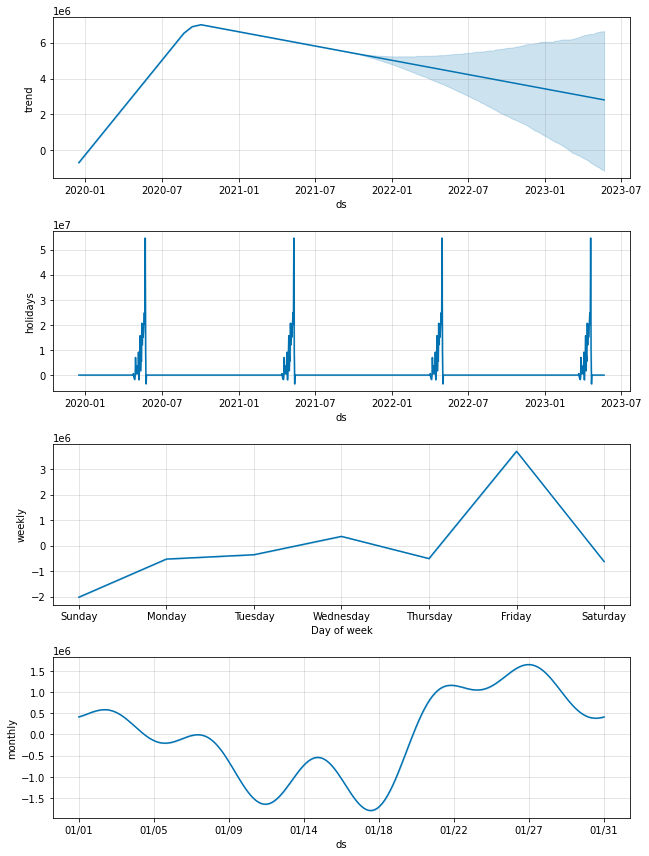

In [ ]:
fig = m2.plot_components(forecast_daily_holiday)

In [ ]:
# Cross Validation
df_cv2 = cross_validation(m2, initial='365 days', horizon='120 days')
df_cv2

INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-05-31 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-01,8.157050e+06,2.962960e+06,1.361705e+07,4083988.0,2021-01-31
1,2021-02-02,7.523179e+06,2.189953e+06,1.318622e+07,5654589.0,2021-01-31
2,2021-02-03,8.148764e+06,2.473354e+06,1.329468e+07,5016516.0,2021-01-31
3,2021-02-04,7.975958e+06,2.351566e+06,1.351192e+07,9268246.0,2021-01-31
4,2021-02-05,1.159007e+07,6.234240e+06,1.695776e+07,27017900.0,2021-01-31
...,...,...,...,...,...,...
355,2021-09-24,8.316771e+06,3.000089e+06,1.363032e+07,18426775.0,2021-05-31
356,2021-09-25,5.299578e+06,-1.072156e+05,1.076407e+07,2729000.0,2021-05-31
357,2021-09-26,4.286594e+06,-1.720996e+06,9.906027e+06,1923999.0,2021-05-31
358,2021-09-27,6.448627e+06,1.057909e+06,1.236498e+07,6760516.0,2021-05-31


In [ ]:
# Export as download if in colab
df_cv2.to_csv('df_cv2.csv', index=False)

In [ ]:
! ls

df_cv1.csv		  df_fc.csv   donasi_online_update_12_maret_2022.csv
df_cv2.csv		  df_p1.csv   sample_data
df_daily.csv		  df_RFM.csv
df_daily_transaction.csv  df_trx.csv


In [ ]:
# Performance metrics
df_p2 = performance_metrics(df_cv2)
df_p2

,horizon,mse,rmse,mae,mape,mdape,coverage
0,12 days,1.704851e+13,4.128985e+06,3.169896e+06,1.303513,0.564381,0.916667
1,13 days,1.903642e+13,4.363074e+06,3.328862e+06,1.350638,0.564381,0.888889
2,14 days,1.945881e+13,4.411214e+06,3.414094e+06,1.483751,0.590255,0.888889
3,15 days,1.911160e+13,4.371682e+06,3.316295e+06,1.446840,0.564381,0.888889
4,16 days,1.980108e+13,4.449841e+06,3.465965e+06,1.570832,0.590255,0.888889
...,...,...,...,...,...,...,...
104,116 days,1.957007e+13,4.423807e+06,3.698113e+06,2.034508,0.985140,0.805556
105,117 days,2.065757e+13,4.545060e+06,3.797660e+06,1.937337,0.926684,0.777778
106,118 days,1.809996e+13,4.254404e+06,3.629382e+06,1.970262,0.988958,0.805556
107,119 days,1.724141e+13,4.152278e+06,3.468264e+06,1.844749,0.938131,0.805556


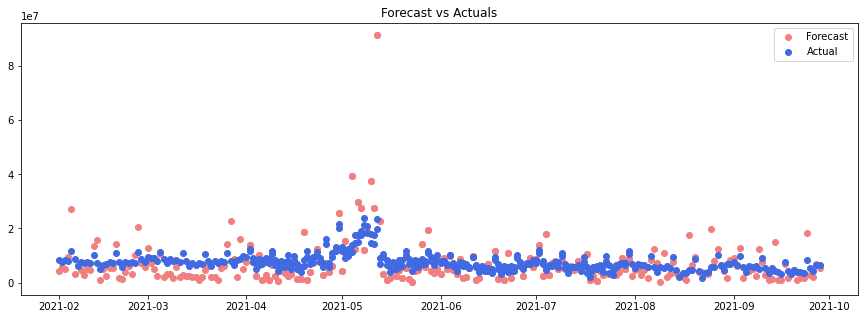

In [ ]:
# Compare the Forecast (Predicted) vs Actuals
plt.figure(figsize=(15, 5))
plt.scatter(df_cv2['ds'], df_cv2['y'],c='lightcoral', label='actual')
plt.scatter(df_cv2['ds'], df_cv2['yhat'], c='royalblue', label='predicted')
plt.legend(['Forecast','Actual'])
plt.title('Forecast vs Actuals')
plt.show()

In [ ]:
# Export as download if in colab
df_p2.to_csv('df_p2.csv', index=False)

In [ ]:
! ls

df_cv1.csv		  df_fc.csv   df_trx.csv
df_cv2.csv		  df_p1.csv   donasi_online_update_12_maret_2022.csv
df_daily.csv		  df_p2.csv   sample_data
df_daily_transaction.csv  df_RFM.csv




> Download the future dataframe



In [ ]:
# Export as download if in colab
forecast_daily.to_csv('forecast_daily.csv', index=False)

In [ ]:
! ls

df_cv1.csv		  df_fc.csv   df_trx.csv
df_cv2.csv		  df_p1.csv   donasi_online_update_12_maret_2022.csv
df_daily.csv		  df_p2.csv   forecast_daily.csv
df_daily_transaction.csv  df_RFM.csv  sample_data


In [ ]:
# Export as download if in colab
forecast_daily_holiday.to_csv('forecast_daily_holiday.csv', index=False)

In [ ]:
! ls

df_cv1.csv		  df_RFM.csv
df_cv2.csv		  df_trx.csv
df_daily.csv		  donasi_online_update_12_maret_2022.csv
df_daily_transaction.csv  forecast_daily.csv
df_fc.csv		  forecast_daily_holiday.csv
df_p1.csv		  sample_data
df_p2.csv


### Daily Transaction

In [ ]:
df_daily_transaction.head()

,tanggal,id_transaksi
0,12/17/2019,4
1,12/18/2019,0
2,12/19/2019,0
3,12/20/2019,0
4,12/21/2019,0


In [ ]:
df_daily_transaction

,tanggal,id_transaksi
0,12/17/2019,4
1,12/18/2019,0
2,12/19/2019,0
3,12/20/2019,0
4,12/21/2019,0
...,...,...
812,3/8/2022,14
813,3/9/2022,7
814,3/10/2022,10
815,3/11/2022,35


In [ ]:
# Rename column name
daily_transaction = df_daily_transaction[['tanggal','id_transaksi']].rename(
columns = {'tanggal':'ds',
             'id_transaksi':'y'})
daily_transaction.head()

,ds,y
0,12/17/2019,4
1,12/18/2019,0
2,12/19/2019,0
3,12/20/2019,0
4,12/21/2019,0


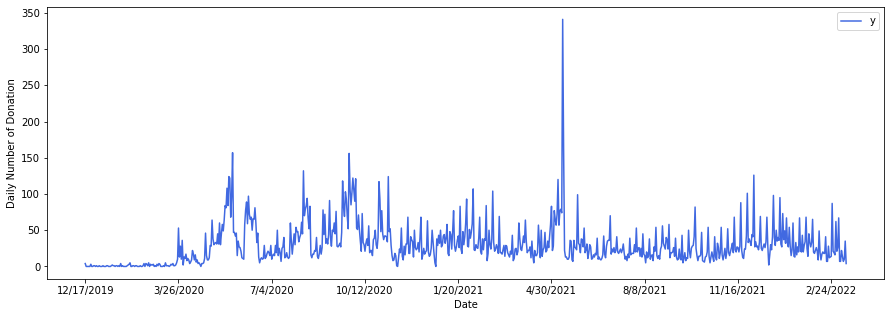

In [ ]:
# plot daily donation
ax = daily_transaction.set_index('ds').plot(figsize = (15, 5), color='royalblue')
ax.set_ylabel('Daily Number of Donation')
ax.set_xlabel('Date')
plt.show()

In [ ]:
# convert to datetime
daily_transaction['ds'] = pd.to_datetime(daily_transaction['ds'])
daily_transaction.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [ ]:
daily_transaction['ds'].quantile(0.80)

Timestamp('2021-09-29 19:12:00')

In [ ]:
# Split train and test 
cutoff = pd.to_datetime('2021-09-29')
train = daily_transaction[daily_transaction['ds'] < cutoff]
test = daily_transaction[daily_transaction['ds'] >= cutoff]

In [ ]:
# Fitting model
m3 = Prophet()
m3.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 5)
m3.fit(train) #only train

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Forecasting
future_daily2 = m3.make_future_dataframe(periods=600, freq='D')
forecast_daily_transaction = m3.predict(future_daily2)
forecast_daily_transaction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-17,-7.089484,-43.912330,16.257713,-7.089484,-7.089484,-6.160665,-6.160665,-6.160665,-3.772486,-3.772486,-3.772486,-2.388179,-2.388179,-2.388179,0.0,0.0,0.0,-13.250149
1,2019-12-18,-6.836308,-41.225372,21.083977,-6.836308,-6.836308,-2.108378,-2.108378,-2.108378,-3.085661,-3.085661,-3.085661,0.977283,0.977283,0.977283,0.0,0.0,0.0,-8.944686
2,2019-12-19,-6.583133,-44.405497,17.026626,-6.583133,-6.583133,-6.314725,-6.314725,-6.314725,-3.978156,-3.978156,-3.978156,-2.336569,-2.336569,-2.336569,0.0,0.0,0.0,-12.897858
3,2019-12-20,-6.329957,-20.665527,39.347183,-6.329957,-6.329957,15.947049,15.947049,15.947049,-5.105746,-5.105746,-5.105746,21.052796,21.052796,21.052796,0.0,0.0,0.0,9.617093
4,2019-12-21,-6.076781,-49.308451,11.999096,-6.076781,-6.076781,-10.947773,-10.947773,-10.947773,-5.162464,-5.162464,-5.162464,-5.785308,-5.785308,-5.785308,0.0,0.0,0.0,-17.024554


In [ ]:
forecast_daily_transaction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-17,-7.089484,-43.912330,16.257713,-7.089484,-7.089484,-6.160665,-6.160665,-6.160665,-3.772486,-3.772486,-3.772486,-2.388179,-2.388179,-2.388179,0.0,0.0,0.0,-13.250149
1,2019-12-18,-6.836308,-41.225372,21.083977,-6.836308,-6.836308,-2.108378,-2.108378,-2.108378,-3.085661,-3.085661,-3.085661,0.977283,0.977283,0.977283,0.0,0.0,0.0,-8.944686
2,2019-12-19,-6.583133,-44.405497,17.026626,-6.583133,-6.583133,-6.314725,-6.314725,-6.314725,-3.978156,-3.978156,-3.978156,-2.336569,-2.336569,-2.336569,0.0,0.0,0.0,-12.897858
3,2019-12-20,-6.329957,-20.665527,39.347183,-6.329957,-6.329957,15.947049,15.947049,15.947049,-5.105746,-5.105746,-5.105746,21.052796,21.052796,21.052796,0.0,0.0,0.0,9.617093
4,2019-12-21,-6.076781,-49.308451,11.999096,-6.076781,-6.076781,-10.947773,-10.947773,-10.947773,-5.162464,-5.162464,-5.162464,-5.785308,-5.785308,-5.785308,0.0,0.0,0.0,-17.024554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,2023-05-17,-19.642019,-74.022385,25.319222,-59.156263,15.718348,-4.812980,-4.812980,-4.812980,-5.790263,-5.790263,-5.790263,0.977283,0.977283,0.977283,0.0,0.0,0.0,-24.454999
1248,2023-05-18,-19.711286,-78.281265,17.321539,-59.325667,15.627849,-10.241936,-10.241936,-10.241936,-7.905367,-7.905367,-7.905367,-2.336569,-2.336569,-2.336569,0.0,0.0,0.0,-29.953222
1249,2023-05-19,-19.780552,-56.604786,42.226895,-59.495072,15.537350,13.997163,13.997163,13.997163,-7.055633,-7.055633,-7.055633,21.052796,21.052796,21.052796,0.0,0.0,0.0,-5.783389
1250,2023-05-20,-19.849819,-80.636404,14.258283,-59.664476,15.446851,-10.538809,-10.538809,-10.538809,-4.753501,-4.753501,-4.753501,-5.785308,-5.785308,-5.785308,0.0,0.0,0.0,-30.388628


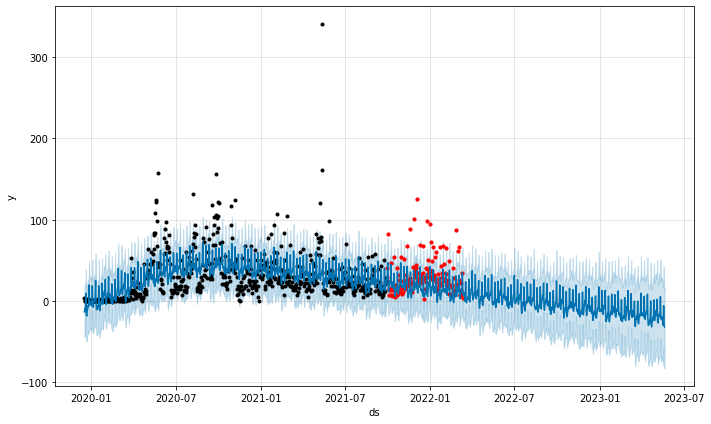

In [ ]:
# Visualize
fig = m3.plot(forecast_daily_transaction)
plt.scatter(x=test['ds'], y=test['y'], s=10, color='red')
plt.show()

In [ ]:
# Set metric for forecast_daily transaction
metric_df3 = forecast_daily_transaction.set_index('ds')[['yhat']].join(daily_transaction.set_index('ds').y).reset_index()

In [ ]:
metric_df3.tail()

,ds,yhat,y
1247,2023-05-17,-24.454999,NaN
1248,2023-05-18,-29.953222,NaN
1249,2023-05-19,-5.783389,NaN
1250,2023-05-20,-30.388628,NaN
1251,2023-05-21,-31.698272,NaN


In [ ]:
metric_df3.dropna(inplace=True)

In [ ]:
metric_df3

,ds,yhat,y
0,2019-12-17,-13.250149,4.0
1,2019-12-18,-8.944686,0.0
2,2019-12-19,-12.897858,0.0
3,2019-12-20,9.617093,0.0
4,2019-12-21,-17.024554,0.0
...,...,...,...
812,2022-03-08,11.356447,14.0
813,2022-03-09,14.351281,7.0
814,2022-03-10,10.740039,10.0
815,2022-03-11,34.954127,35.0


In [ ]:
# R2 Score
R2 = r2_score(metric_df3.y, metric_df3.yhat)
R2

0.29283225087232867

In [ ]:
# MSE
MSE = mean_squared_error(metric_df3.y, metric_df3.yhat)
MSE

562.4113100204485

In [ ]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

23.715212628615593

In [ ]:
# MAE
MAE = mean_absolute_error(metric_df3.y, metric_df3.yhat)
MAE

15.081915377973637

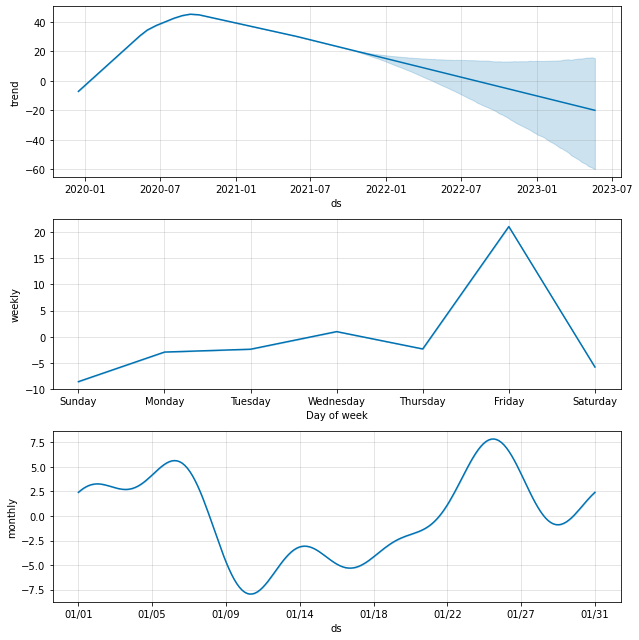

In [ ]:
fig = m3.plot_components(forecast_daily_transaction)

In [ ]:
# Cross Validation
df_cv3 = cross_validation(m3, initial='365 days', horizon='120 days')
df_cv3

INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-05-31 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-01,28.697456,-1.980491,59.179548,51,2021-01-31
1,2021-02-02,29.889461,-0.542638,60.205314,39,2021-01-31
2,2021-02-03,30.811994,1.233512,62.019639,47,2021-01-31
3,2021-02-04,31.931992,2.519152,62.672004,59,2021-01-31
4,2021-02-05,56.715211,25.266475,88.267320,107,2021-01-31
...,...,...,...,...,...,...
355,2021-09-24,54.473125,17.621412,87.593640,50,2021-05-31
356,2021-09-25,28.253677,-6.220740,65.019042,21,2021-05-31
357,2021-09-26,25.449585,-8.947372,60.256685,12,2021-05-31
358,2021-09-27,34.179927,-3.405150,67.231763,25,2021-05-31


In [ ]:
# Export as download if in colab
df_cv3.to_csv('df_cv3.csv', index=False)

In [ ]:
# Performance metrics
df_p3 = performance_metrics(df_cv3)
df_p3

,horizon,mse,rmse,mae,mape,mdape,coverage
0,12 days,303.721827,17.427617,13.843857,0.638737,0.382074,0.944444
1,13 days,297.651201,17.252571,13.741451,0.691589,0.388033,0.944444
2,14 days,298.446214,17.275596,13.728908,0.711260,0.394189,0.944444
3,15 days,303.710764,17.427299,14.139483,0.738966,0.429315,0.944444
4,16 days,293.367106,17.127963,14.099805,0.759058,0.439152,0.944444
...,...,...,...,...,...,...,...
104,116 days,135.418992,11.636967,9.446408,0.812688,0.439337,1.000000
105,117 days,208.205357,14.429323,10.296525,0.761159,0.410664,0.972222
106,118 days,215.602452,14.683407,10.724207,0.775786,0.410682,0.972222
107,119 days,203.900249,14.279364,10.119957,0.701191,0.356305,0.972222


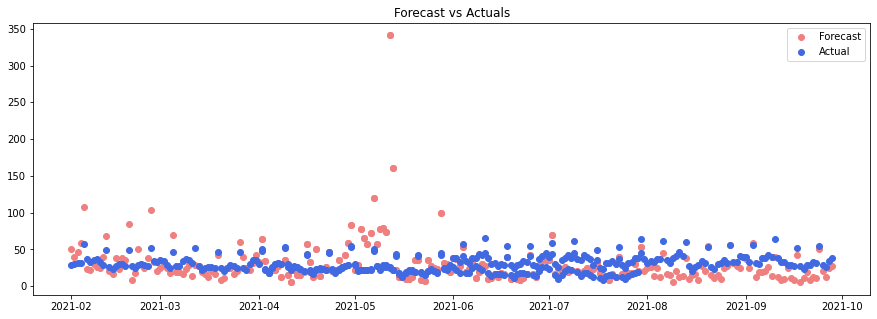

In [ ]:
# Compare the Forecast (Predicted) vs Actuals
plt.figure(figsize=(15, 5))
plt.scatter(df_cv3['ds'], df_cv3['y'],c='lightcoral', label='actual')
plt.scatter(df_cv3['ds'], df_cv3['yhat'], c='royalblue', label='predicted')
plt.legend(['Forecast','Actual'])
plt.title('Forecast vs Actuals')
plt.show()


> **Insert seasonal "Holiday"**


In [ ]:
holiday = pd.DataFrame({
    'holiday' : 'eid_al_fitr',
    'ds' : pd.to_datetime(['2020-05-25','2021-05-14',  # past date, historical data 
                           '2022-05-02', '2023-04-21']),# future date, to be forecasted
    'lower_window' : -30,
    'upper_window' : 0})
holiday

,holiday,ds,lower_window,upper_window
0,eid_al_fitr,2020-05-25,-30,0
1,eid_al_fitr,2021-05-14,-30,0
2,eid_al_fitr,2022-05-02,-30,0
3,eid_al_fitr,2023-04-21,-30,0


In [ ]:
# Fitting model 
m4 = Prophet(
    holidays = holiday,
    holidays_prior_scale = 0.1 )
m4.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 5)
m4.fit(train) #only train

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Forecasting
future_daily_transaction_holiday = m4.make_future_dataframe(periods = 600, freq = 'D')
forecast_daily_transaction_holiday = m4.predict(future_daily_transaction_holiday)
forecast_daily_transaction_holiday.loc[(forecast_daily_transaction_holiday.yhat < 0),['yhat']] = 0
forecast_daily_transaction_holiday.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,eid_al_fitr,...,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-17,-6.648828,-36.977228,10.118971,-6.648828,-6.648828,-5.930145,-5.930145,-5.930145,0.0,...,-4.511777,-4.511777,-4.511777,-1.418368,-1.418368,-1.418368,0.0,0.0,0.0,0.000000
1,2019-12-18,-6.443658,-32.689380,13.915977,-6.443658,-6.443658,-3.628620,-3.628620,-3.628620,0.0,...,-3.424779,-3.424779,-3.424779,-0.203841,-0.203841,-0.203841,0.0,0.0,0.0,0.000000
2,2019-12-19,-6.238489,-35.786874,9.451020,-6.238489,-6.238489,-6.389120,-6.389120,-6.389120,0.0,...,-3.785045,-3.785045,-3.785045,-2.604075,-2.604075,-2.604075,0.0,0.0,0.0,0.000000
3,2019-12-20,-6.033319,-12.418044,33.674924,-6.033319,-6.033319,16.748034,16.748034,16.748034,0.0,...,-5.294421,-5.294421,-5.294421,22.042456,22.042456,22.042456,0.0,0.0,0.0,10.714715
4,2019-12-21,-5.828150,-44.094038,4.217567,-5.828150,-5.828150,-13.557304,-13.557304,-13.557304,0.0,...,-6.699681,-6.699681,-6.699681,-6.857624,-6.857624,-6.857624,0.0,0.0,0.0,0.000000


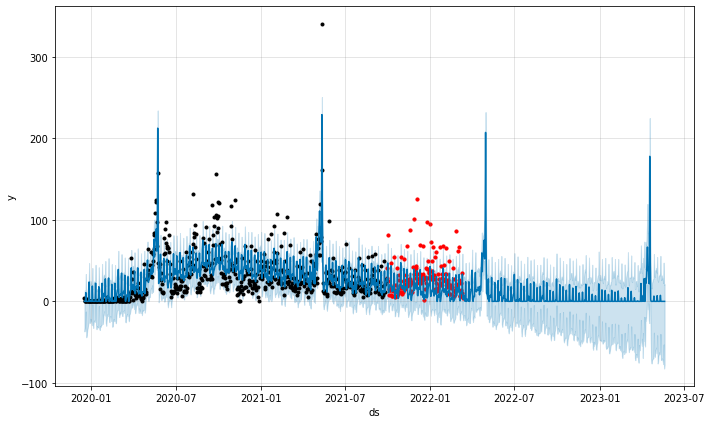

In [ ]:
# Visualize
fig = m4.plot(forecast_daily_transaction_holiday)
plt.scatter(x=test['ds'], y=test['y'], s=10, color='red')
plt.show()

In [ ]:
# Set metric for forecast_daily_transaction_holiday
metric_df4 = forecast_daily_transaction_holiday.set_index('ds')[['yhat']].join(daily_transaction.set_index('ds').y).reset_index()

In [ ]:
metric_df4.tail()

,ds,yhat,y
1247,2023-05-17,0.0,NaN
1248,2023-05-18,0.0,NaN
1249,2023-05-19,0.0,NaN
1250,2023-05-20,0.0,NaN
1251,2023-05-21,0.0,NaN


In [ ]:
metric_df4.dropna(inplace=True)

In [ ]:
metric_df4

,ds,yhat,y
0,2019-12-17,0.000000,4.0
1,2019-12-18,0.000000,0.0
2,2019-12-19,0.000000,0.0
3,2019-12-20,10.714715,0.0
4,2019-12-21,0.000000,0.0
...,...,...,...
812,2022-03-08,10.689473,14.0
813,2022-03-09,12.345496,7.0
814,2022-03-10,9.451859,10.0
815,2022-03-11,33.444830,35.0


In [ ]:
# R2 Score
R2 = r2_score(metric_df4.y, metric_df4.yhat)
R2

0.5593639556158718

In [ ]:
# MSE
MSE = mean_squared_error(metric_df4.y, metric_df4.yhat)
MSE

350.4383440421363

In [ ]:
# RMSE
RMSE = np.sqrt(MSE)
RMSE

18.71999850539888

In [ ]:
# MAE
MAE = mean_absolute_error(metric_df4.y, metric_df4.yhat)
MAE

12.788628286756342

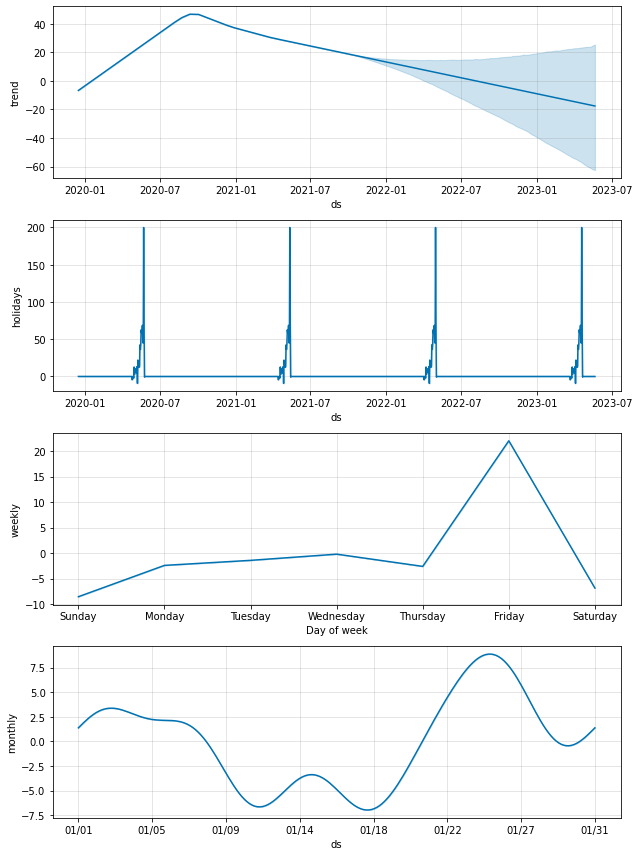

In [ ]:
fig = m4.plot_components(forecast_daily_transaction_holiday)

In [ ]:
# Cross Validation
df_cv4 = cross_validation(m4, initial='365 days', horizon='120 days')
df_cv4

INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-05-31 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-01,27.694222,-1.313711,57.014810,51,2021-01-31
1,2021-02-02,28.796220,0.871511,57.579141,39,2021-01-31
2,2021-02-03,29.715506,2.020612,56.918094,47,2021-01-31
3,2021-02-04,31.012488,2.481129,57.395450,59,2021-01-31
4,2021-02-05,56.003071,28.750750,80.625257,107,2021-01-31
...,...,...,...,...,...,...
355,2021-09-24,32.398068,8.031869,55.857727,50,2021-05-31
356,2021-09-25,6.498751,-17.777720,28.639952,21,2021-05-31
357,2021-09-26,7.530537,-16.238413,34.057846,12,2021-05-31
358,2021-09-27,17.672805,-9.850309,41.865164,25,2021-05-31


In [ ]:
# Export as download if in colab
df_cv4.to_csv('df_cv4.csv', index=False)

In [ ]:
# Performance metrics
df_p4 = performance_metrics(df_cv4)
df_p4

,horizon,mse,rmse,mae,mape,mdape,coverage
0,12 days,228.691564,15.122552,12.025653,0.493539,0.326828,0.944444
1,13 days,207.664594,14.410572,11.105293,0.495222,0.356790,0.944444
2,14 days,197.348276,14.048070,10.396423,0.483336,0.326828,0.944444
3,15 days,205.060205,14.319923,10.769963,0.493880,0.345778,0.944444
4,16 days,196.325002,14.011602,10.475103,0.499029,0.345778,0.972222
...,...,...,...,...,...,...,...
104,116 days,71.337072,8.446128,6.693110,0.369323,0.332644,1.000000
105,117 days,169.483997,13.018602,8.288567,0.378319,0.337818,0.972222
106,118 days,172.268929,13.125126,8.503195,0.379574,0.346720,0.972222
107,119 days,171.360115,13.090459,8.447642,0.357021,0.320401,0.972222


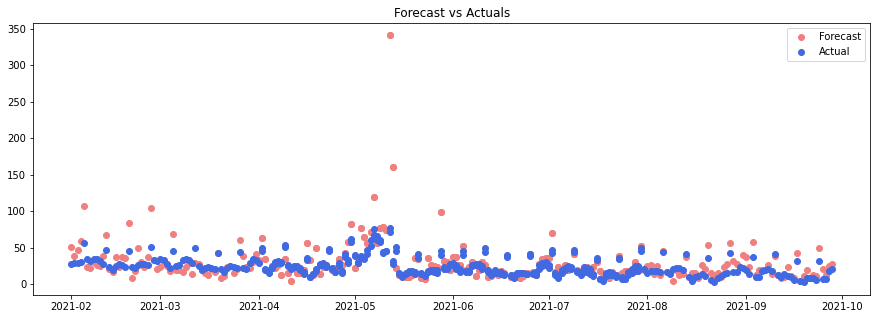

In [ ]:
# Compare the Forecast (Predicted) vs Actuals
plt.figure(figsize=(15, 5))
plt.scatter(df_cv4['ds'], df_cv4['y'],c='lightcoral', label='actual')
plt.scatter(df_cv4['ds'], df_cv4['yhat'], c='royalblue', label='predicted')
plt.legend(['Forecast','Actual'])
plt.title('Forecast vs Actuals')
plt.show()



> Download the future dataframe



In [ ]:
# Export as download if in colab
forecast_daily_transaction.to_csv('forecast_daily_transaction.csv', index=False)

In [ ]:
# Export as download if in colab
forecast_daily_transaction_holiday.to_csv('forecast_daily_transaction_holiday.csv', index=False)

In [ ]:
! ls

df_cv1.csv		  df_RFM.csv
df_cv2.csv		  df_trx.csv
df_cv3.csv		  donasi_online_update_12_maret_2022.csv
df_cv4.csv		  forecast_daily.csv
df_daily.csv		  forecast_daily_holiday.csv
df_daily_transaction.csv  forecast_daily_transaction.csv
df_fc.csv		  forecast_daily_transaction_holiday.csv
df_p1.csv		  sample_data
df_p2.csv


# Conclusion

*   Donors were divided into 5 segments by using RFM Method such as Champions Best Donator(1894 Donator), Potential High Donator(494 Donator), General Donator(2401 Donator), Churned Best Donator(343 Donator), and About To Sleep(5038 Donator).

*   Two approaches were applied in this case: machine learning models and statistical models.

*   FB prophet is the best model. FBprophet is effective in improving model performance by detecting missing data and  inserting seasonal holidays.